In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

data = []
labels = []
classes = 43
cur_path = os.getcwd()
data_path = os.path.join(cur_path, 'data')
for i in range(classes):
    path = os.path.join(data_path,'train', str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + '/'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")
data = np.array(data)
labels = np.array(labels)

In [23]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [19]:
print(data.shape, labels.shape)
#Splitting training and testing dataset
X_t1, X_t2, y_t1, y_t2 = train_test_split(data, labels, test_size=0.2, random_state=42)
print(X_t1.shape, X_t2.shape, y_t1.shape, y_t2.shape)

(39209, 30, 30, 3) (39209,)
(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)
(39209, 30, 30, 3) (39209,)
(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [20]:
#Converting the labels into one hot encoding
y_t1 = to_categorical(y_t1, 43)
y_t2 = to_categorical(y_t2, 43)

# print(y_t1)
# print(y_t2)

In [21]:
"""
Layers:
2 Conv2D layer (filter=32, kernel_size=(5,5), activation=”relu”)

MaxPool2D layer ( pool_size=(2,2))

Dropout layer (rate=0.25)

2 Conv2D layer (filter=64, kernel_size=(3,3), activation=”relu”)

MaxPool2D layer ( pool_size=(2,2))

Dropout layer (rate=0.25)

Dense Fully connected layer (256 nodes, activation=”relu”)

Dropout layer (rate=0.5)

Dense layer (43 nodes, activation=” softmax”)
"""

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_t1.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [22]:
# Train Model
eps = 15
anc = model.fit(X_t1, y_t1, batch_size=32, epochs=eps, validation_data=(X_t2, y_t2))

Epoch 1/15
981/981 [==============================] - 12s 3ms/step - loss: 3.6147 - accuracy: 0.0542 - val_loss: 3.4817 - val_accuracy: 0.0465

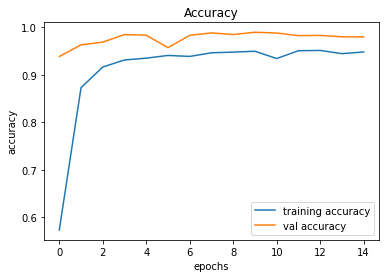

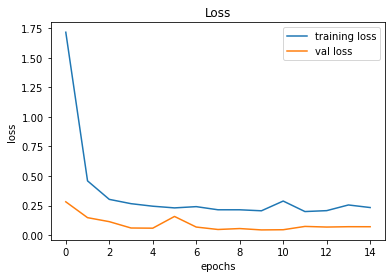

In [30]:
#plotting graphs for accuracy
plt.figure(0)
plt.plot(anc.history['accuracy'], label='training accuracy')
plt.plot(anc.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.figure(1)
plt.plot(anc.history['loss'], label='training loss')
plt.plot(anc.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [39]:
#testing accuracy on test dataset
from sklearn.metrics import accuracy_score
y_test = pd.read_csv('data/Test.csv')
labels = y_test["ClassId"].values
imgs = y_test["Path"].values
data=[]
for img in imgs:
   image = Image.open('data/' + img)
   image = image.resize((30,30))
   data.append(np.array(image))
X_test=np.array(data)
pred_x = model.predict(X_test)
pred=np.argmax(pred_x,axis=1)

[[0.0000000e+00 2.7403041e-36 0.0000000e+00 ... 1.8371875e-27
  6.2073474e-29 0.0000000e+00]
 [0.0000000e+00 1.0000000e+00 3.0080601e-30 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 ...
 [1.4845670e-03 3.9586399e-02 1.5081103e-01 ... 1.0302329e-03
  7.4702268e-03 7.4788779e-03]
 [9.5692244e-17 8.2791295e-11 2.4365204e-10 ... 2.6918046e-08
  1.9733439e-16 1.6694033e-09]
 [1.7177222e-25 3.5525519e-22 5.4666344e-20 ... 4.5339056e-18
  1.3239300e-24 1.0971283e-17]]


In [35]:
#Accuracy with the test data
from sklearn.metrics import accuracy_score
print(accuracy_score(labels, pred))

0.9577988915281077


In [38]:
save_path = os.path.join(cur_path, 'traffic_classifier.h5')
model.save(save_path)  # to save